In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_14_ECLAT'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_14_ECLAT


In [5]:
import sys
from collections import defaultdict
import random

In [2]:
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())
 
class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()
 
def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
             
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
             
            # recurse, with l as prefix
            recurse(new_items, l)
     
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}


In [3]:
dataset = [['Eggs', 'Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Orange', 'Corn', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Orange', 'Eggs'], 
           ['Corn', 'Coke', 'Kidney Beans', 'Ice cream'],
           ['Dill', 'Onion', 'Nutmeg'],
           ['Coke', 'Apple', 'Ice cream']
          ]


In [7]:
trans_list = tidlists(dataset)
trans_list

[('Eggs', {0, 1, 2, 4, 5, 6}),
 ('Milk', {0, 2, 3, 6}),
 ('Onion', {0, 1, 4, 8}),
 ('Nutmeg', {0, 1, 8}),
 ('Kidney Beans', {0, 2, 3, 4, 7}),
 ('Yogurt', {0, 1, 3, 5}),
 ('Dill', {1, 8}),
 ('Apple', {2, 6, 9}),
 ('Unicorn', {3}),
 ('Corn', {3, 4, 5, 7}),
 ('Ice cream', {4, 7, 9}),
 ('Orange', {5, 6}),
 ('Coke', {7, 9})]

In [9]:
result = eclat(trans_list, minsup=2, minlen=2)

In [10]:
result

{('Apple', 'Eggs'): 2,
 ('Apple', 'Milk'): 2,
 ('Apple', 'Milk', 'Eggs'): 2,
 ('Coke', 'Ice cream'): 2,
 ('Corn', 'Eggs'): 2,
 ('Corn', 'Kidney Beans'): 3,
 ('Corn', 'Yogurt'): 2,
 ('Dill', 'Nutmeg'): 2,
 ('Dill', 'Nutmeg', 'Onion'): 2,
 ('Dill', 'Onion'): 2,
 ('Ice cream', 'Corn'): 2,
 ('Ice cream', 'Corn', 'Kidney Beans'): 2,
 ('Ice cream', 'Kidney Beans'): 2,
 ('Kidney Beans', 'Eggs'): 3,
 ('Kidney Beans', 'Milk'): 3,
 ('Kidney Beans', 'Milk', 'Eggs'): 2,
 ('Kidney Beans', 'Onion'): 2,
 ('Kidney Beans', 'Onion', 'Eggs'): 2,
 ('Milk', 'Eggs'): 3,
 ('Nutmeg', 'Eggs'): 2,
 ('Nutmeg', 'Onion'): 3,
 ('Nutmeg', 'Onion', 'Eggs'): 2,
 ('Onion', 'Eggs'): 3,
 ('Orange', 'Eggs'): 2,
 ('Yogurt', 'Eggs'): 3,
 ('Yogurt', 'Kidney Beans'): 2,
 ('Yogurt', 'Kidney Beans', 'Milk'): 2,
 ('Yogurt', 'Milk'): 2,
 ('Yogurt', 'Nutmeg'): 2,
 ('Yogurt', 'Nutmeg', 'Eggs'): 2,
 ('Yogurt', 'Nutmeg', 'Onion'): 2,
 ('Yogurt', 'Nutmeg', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Onion'): 2,
 ('Yogurt', 'Onion', 'Eggs'): 2}

In [11]:
for key, value in result.items():
    if 'Milk' in key:
        print(key, ':', value)

('Apple', 'Milk') : 2
('Apple', 'Milk', 'Eggs') : 2
('Yogurt', 'Kidney Beans', 'Milk') : 2
('Yogurt', 'Milk') : 2
('Kidney Beans', 'Milk') : 3
('Kidney Beans', 'Milk', 'Eggs') : 2
('Milk', 'Eggs') : 3


In [12]:
keys = result.values()
titles = result.keys()
list_titles = []
for item in titles:
    list_titles.append(','.join(item))

In [13]:
keys

dict_values([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3])

In [14]:
titles

dict_keys([('Coke', 'Ice cream'), ('Orange', 'Eggs'), ('Ice cream', 'Corn'), ('Ice cream', 'Corn', 'Kidney Beans'), ('Ice cream', 'Kidney Beans'), ('Corn', 'Yogurt'), ('Corn', 'Kidney Beans'), ('Corn', 'Eggs'), ('Apple', 'Milk'), ('Apple', 'Milk', 'Eggs'), ('Apple', 'Eggs'), ('Dill', 'Nutmeg'), ('Dill', 'Nutmeg', 'Onion'), ('Dill', 'Onion'), ('Yogurt', 'Kidney Beans'), ('Yogurt', 'Kidney Beans', 'Milk'), ('Yogurt', 'Nutmeg'), ('Yogurt', 'Nutmeg', 'Onion'), ('Yogurt', 'Nutmeg', 'Onion', 'Eggs'), ('Yogurt', 'Nutmeg', 'Eggs'), ('Yogurt', 'Onion'), ('Yogurt', 'Onion', 'Eggs'), ('Yogurt', 'Milk'), ('Yogurt', 'Eggs'), ('Kidney Beans', 'Onion'), ('Kidney Beans', 'Onion', 'Eggs'), ('Kidney Beans', 'Milk'), ('Kidney Beans', 'Milk', 'Eggs'), ('Kidney Beans', 'Eggs'), ('Nutmeg', 'Onion'), ('Nutmeg', 'Onion', 'Eggs'), ('Nutmeg', 'Eggs'), ('Onion', 'Eggs'), ('Milk', 'Eggs')])

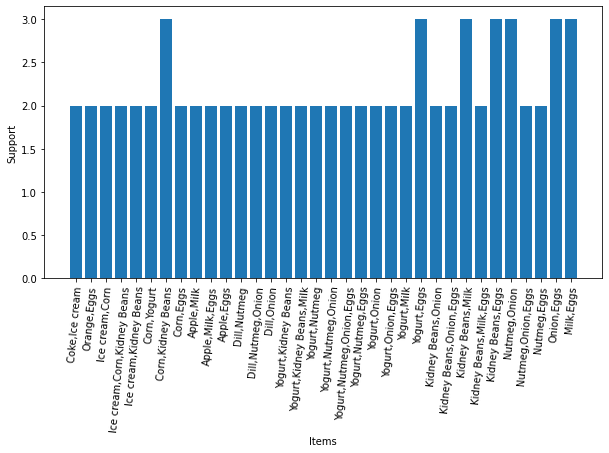

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(list_titles, keys)
plt.ylabel('Support')
plt.xlabel('Items')
plt.xticks(rotation=85)
plt.show()